In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from general_functions import *
from spherical_flux import *
from sliceplot import *
%load_ext autoreload
%autoreload
%autoreload 2

In [2]:
plt.style.use(['seaborn-poster'])

In [3]:
from mpl_toolkits import mplot3d
from matplotlib.patches import Circle

# Plume:

In [4]:
ds_names_all, ds_types_all = get_datasets(load_key='R2349')
ds_keys = ['batsrus_mf_10km_3deg_95'] #these lines establish the path to the dataset
ds_keys_hr = ['batsrus_mf_5km_15deg_95'] # path to high res data
ds_names = {dsk:dsn for dsk, dsn in ds_names_all.items() if dsk in ds_keys}
ds_types = {dsk:[dsk] for dsk in ds_keys}
ds_names_hr = {dsk:dsn for dsk, dsn in ds_names_all.items() if dsk in ds_keys_hr}
ds_types_hr = {dsk:[dsk] for dsk in ds_keys_hr}

fields_num_dens = ['O2_p1_number_density']
fields_vx = ['O2_p1_velocity_x']
fields_vy = ['O2_p1_velocity_y']
fields_vz = ['O2_p1_velocity_z']
x = np.linspace(-2.0, 2.0, 40)
y = np.linspace(-2.0, 2.0, 40)
z = np.repeat(2.0,1600)
meshgrid_x, meshgrid_y = np.meshgrid(x,y)
flat_meshgrid_x = meshgrid_x.flatten()
flat_meshgrid_y = meshgrid_y.flatten()
coords = np.array([flat_meshgrid_x, flat_meshgrid_y, z])
    
indxs = get_path_idxs(coords, ds_names, ds_types) #low res indxs
indxs_hr = get_path_idxs(coords, ds_names_hr, ds_types_hr) #high res indxs
vx_data_i = get_all_data(ds_names, ds_types, indxs, fields_vx) 
vx_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_vx)
vy_data_i = get_all_data(ds_names, ds_types, indxs, fields_vy) 
vy_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_vy)
vz_data_i = get_all_data(ds_names, ds_types, indxs, fields_vz) 
vz_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_vz)
num_dens_data_i = get_all_data(ds_names, ds_types, indxs, fields_num_dens)
num_dens_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_num_dens)

vx_y_axis_values = vx_data_i['O2_p1_velocity_x']['batsrus_mf_10km_3deg_95'] 
vx_y_axis_values_hr = vx_data_i_hr['O2_p1_velocity_x']['batsrus_mf_5km_15deg_95']
vy_y_axis_values = vy_data_i['O2_p1_velocity_y']['batsrus_mf_10km_3deg_95'] 
vy_y_axis_values_hr = vy_data_i_hr['O2_p1_velocity_y']['batsrus_mf_5km_15deg_95']
vz_y_axis_values = vz_data_i['O2_p1_velocity_z']['batsrus_mf_10km_3deg_95'] 
vz_y_axis_values_hr = vz_data_i_hr['O2_p1_velocity_z']['batsrus_mf_5km_15deg_95']
num_dens_y_axis_values = num_dens_data_i['O2_p1_number_density']['batsrus_mf_10km_3deg_95']
num_dens_y_axis_values_hr = num_dens_data_i_hr['O2_p1_number_density']['batsrus_mf_5km_15deg_95']
    
flux_z_vals_lr = vz_y_axis_values * num_dens_y_axis_values * 1e5
flux_z_vals_hr = vz_y_axis_values_hr * num_dens_y_axis_values_hr * 1e5

In [5]:
print 'Median Flux of 10km 3 deg z=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.median(flux_z_vals_lr))
print 'Median Flux of 5km 1.5 deg z=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.median(flux_z_vals_hr))
print''
print 'Mean Flux of 10km 3 deg z=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.mean(flux_z_vals_lr))
print 'Mean Flux of 5km 1.5 deg z=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.mean(flux_z_vals_hr))
print ''
covered_area = 16 * (3390.0**2) * 1e10 #covered area of slice in cm^2
escape_rate_lr_mean = np.mean(flux_z_vals_lr) * covered_area
escape_rate_hr_mean = np.mean(flux_z_vals_hr) * covered_area
print 'Escape rate(mean meth) of 10km 3 deg z=2.0 slice is {:.3e} s^-1'.format(escape_rate_lr_mean)
print 'Escape rate(mean meth) of 5km 1.5 deg z=2.0 slice is {:.3e} s^-1'.format(escape_rate_hr_mean)
print ''
escape_rate_lr_median = np.median(flux_z_vals_lr) * covered_area
escape_rate_hr_median = np.median(flux_z_vals_hr) * covered_area
print 'Escape rate(median meth) of 10km 3 deg z=2.0 slice is {:.3e} s^-1'.format(escape_rate_lr_median)
print 'Escape rate(median meth) of 5km 1.5 deg z=2.0 slice is {:.3e} s^-1'.format(escape_rate_hr_median)

Median Flux of 10km 3 deg z=2.0 slice is 9.372e+03 cm^-2 s^-1
Median Flux of 5km 1.5 deg z=2.0 slice is 1.418e+03 cm^-2 s^-1

Mean Flux of 10km 3 deg z=2.0 slice is 3.028e+05 cm^-2 s^-1
Mean Flux of 5km 1.5 deg z=2.0 slice is 2.059e+05 cm^-2 s^-1

Escape rate(mean meth) of 10km 3 deg z=2.0 slice is 5.567e+23 s^-1
Escape rate(mean meth) of 5km 1.5 deg z=2.0 slice is 3.787e+23 s^-1

Escape rate(median meth) of 10km 3 deg z=2.0 slice is 1.723e+22 s^-1
Escape rate(median meth) of 5km 1.5 deg z=2.0 slice is 2.607e+21 s^-1


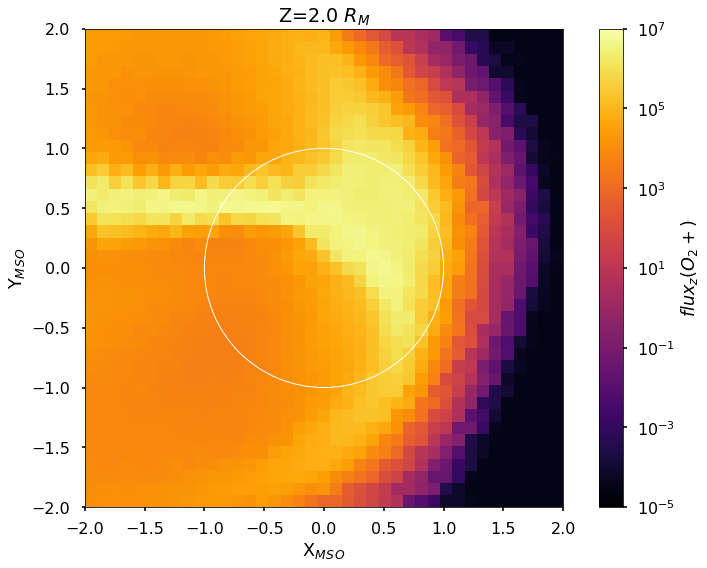

In [12]:
x = np.linspace(-2.0, 2.0, 40)
y = np.linspace(-2.0, 2.0, 40)
z = np.repeat(2.0,1600)
meshgrid_x, meshgrid_y = np.meshgrid(x,y)
cmap = 'inferno'
vmin, vmax = 1e-5 , 1e7 #np.max(flux_z_vals_lr) 
norm = LogNorm(vmin=vmin, vmax=vmax)
fig, ax = plt.subplots(1)
plt.pcolormesh(meshgrid_x, meshgrid_y, flux_z_vals_lr.reshape(meshgrid_x.shape),cmap=cmap,norm=norm,rasterized=True,vmin=vmin,vmax=vmax)
plt.xlabel('X$_M$$_S$$_O$')
plt.ylabel('Y$_M$$_S$$_O$')
plt.colorbar(label='$flux_z(O_2+)$')#,format= '%.0e')
plt.gca().set_aspect('equal')
plt.title('Z=2.0 $R_M$')
circ1 = Circle((0,0), 1, facecolor='none', edgecolor='w', lw=1)
ax.add_patch(circ1)
#plt.savefig('LR_flux_plume_z_2_log.png')

In [ ]:
x = np.linspace(-2.0, 2.0, 40)
y = np.linspace(-2.0, 2.0, 40)
z = np.repeat(2.0,1600)
meshgrid_x, meshgrid_y = np.meshgrid(x,y)
cmap = 'inferno'
vmin, vmax = 1e-5 , 1e7 #np.max(flux_z_vals_hr) 
norm = LogNorm(vmin=vmin, vmax=vmax)
fig, ax = plt.subplots(1)
plt.pcolormesh(meshgrid_x, meshgrid_y, flux_z_vals_hr.reshape(meshgrid_x.shape),cmap=cmap,norm=norm,rasterized=True,vmin=vmin,vmax=vmax)
plt.xlabel('X$_M$$_S$$_O$')
plt.ylabel('Y$_M$$_S$$_O$')
plt.colorbar(label='$flux_z(O_2+)$')#,format= '%.0e')
plt.gca().set_aspect('equal')
plt.title('Z=2.0 $R_M$')
circ1 = Circle((0,0), 1, facecolor='none', edgecolor='w', lw=1)
ax.add_patch(circ1)
plt.savefig('HR_flux_plume_z_2_log.png')

# Tail:

In [6]:
ds_names_all, ds_types_all = get_datasets(load_key='R2349')
ds_keys = ['batsrus_mf_10km_3deg_95'] #these lines establish the path to the dataset
ds_keys_hr = ['batsrus_mf_5km_15deg_95'] # path to high res data
ds_names = {dsk:dsn for dsk, dsn in ds_names_all.items() if dsk in ds_keys}
ds_types = {dsk:[dsk] for dsk in ds_keys}
ds_names_hr = {dsk:dsn for dsk, dsn in ds_names_all.items() if dsk in ds_keys_hr}
ds_types_hr = {dsk:[dsk] for dsk in ds_keys_hr}

fields_num_dens = ['O2_p1_number_density']
fields_vx = ['O2_p1_velocity_x']
fields_vy = ['O2_p1_velocity_y']
fields_vz = ['O2_p1_velocity_z']

x = np.repeat(-2.0, 1600)
y = np.linspace(-2.0, 2.0, 40)
z = np.linspace(-2.0, 2.0, 40)
meshgrid_y, meshgrid_z = np.meshgrid(y,z)
flat_meshgrid_y = meshgrid_y.flatten()
flat_meshgrid_z = meshgrid_z.flatten()
coords = np.array([x, flat_meshgrid_y, flat_meshgrid_z])
    
indxs = get_path_idxs(coords, ds_names, ds_types) #low res indxs
indxs_hr = get_path_idxs(coords, ds_names_hr, ds_types_hr) #high res indxs
vx_data_i = get_all_data(ds_names, ds_types, indxs, fields_vx) 
vx_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_vx)
vy_data_i = get_all_data(ds_names, ds_types, indxs, fields_vy) 
vy_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_vy)
vz_data_i = get_all_data(ds_names, ds_types, indxs, fields_vz) 
vz_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_vz)
num_dens_data_i = get_all_data(ds_names, ds_types, indxs, fields_num_dens)
num_dens_data_i_hr = get_all_data(ds_names_hr, ds_types_hr, indxs_hr, fields_num_dens)

vx_y_axis_values = vx_data_i['O2_p1_velocity_x']['batsrus_mf_10km_3deg_95'] 
vx_y_axis_values_hr = vx_data_i_hr['O2_p1_velocity_x']['batsrus_mf_5km_15deg_95']
vy_y_axis_values = vy_data_i['O2_p1_velocity_y']['batsrus_mf_10km_3deg_95'] 
vy_y_axis_values_hr = vy_data_i_hr['O2_p1_velocity_y']['batsrus_mf_5km_15deg_95']
vz_y_axis_values = vz_data_i['O2_p1_velocity_z']['batsrus_mf_10km_3deg_95'] 
vz_y_axis_values_hr = vz_data_i_hr['O2_p1_velocity_z']['batsrus_mf_5km_15deg_95']
num_dens_y_axis_values = num_dens_data_i['O2_p1_number_density']['batsrus_mf_10km_3deg_95']
num_dens_y_axis_values_hr = num_dens_data_i_hr['O2_p1_number_density']['batsrus_mf_5km_15deg_95']

flux_x_vals_lr = vx_y_axis_values * num_dens_y_axis_values * 1e5
flux_x_vals_hr = vx_y_axis_values_hr * num_dens_y_axis_values_hr * 1e5

In [7]:
print 'Median Flux of 10km 3 deg x=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.median(flux_x_vals_lr))
print 'Median Flux of 5km 1.5 deg x=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.median(flux_x_vals_hr))
print''
print 'Mean Flux of 10km 3 deg x=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.mean(flux_x_vals_lr))
print 'Mean Flux of 5km 1.5 deg x=2.0 slice is {:.3e} cm^-2 s^-1'.format(np.mean(flux_x_vals_hr))
print ''
covered_area = 16 * (3390.0**2) * 1e10 #covered area of slice in cm^2
escape_rate_lr_mean = np.mean(flux_x_vals_lr) * covered_area
escape_rate_hr_mean = np.mean(flux_x_vals_hr) * covered_area
print 'Escape rate of 10km 3 deg x=2.0 slice is {:.3e} s^-1'.format(escape_rate_lr_mean)
print 'Escape rate of 5km 1.5 deg zx=2.0 slice is {:.3e} s^-1'.format(escape_rate_hr_mean)
print ''
escape_rate_lr_median = np.median(flux_x_vals_lr) * covered_area
escape_rate_hr_median = np.median(flux_x_vals_hr) * covered_area
print 'Escape rate(median meth) of 10km 3 deg z=2.0 slice is {:.3e} s^-1'.format(escape_rate_lr_median)
print 'Escape rate(median meth) of 5km 1.5 deg z=2.0 slice is {:.3e} s^-1'.format(escape_rate_hr_median)

Median Flux of 10km 3 deg x=2.0 slice is -6.510e+04 cm^-2 s^-1
Median Flux of 5km 1.5 deg x=2.0 slice is -4.674e+04 cm^-2 s^-1

Mean Flux of 10km 3 deg x=2.0 slice is -1.566e+06 cm^-2 s^-1
Mean Flux of 5km 1.5 deg x=2.0 slice is -5.912e+05 cm^-2 s^-1

Escape rate of 10km 3 deg x=2.0 slice is -2.880e+24 s^-1
Escape rate of 5km 1.5 deg zx=2.0 slice is -1.087e+24 s^-1

Escape rate(median meth) of 10km 3 deg z=2.0 slice is -1.197e+23 s^-1
Escape rate(median meth) of 5km 1.5 deg z=2.0 slice is -8.594e+22 s^-1


In [34]:
print np.min(flux_x_vals_lr), np.min(flux_x_vals_hr)
print np.max(flux_x_vals_lr), np.max(flux_x_vals_hr)

-65363435.913097695 -56673840.89403354
3700325.3738264674 1439070.8401565056


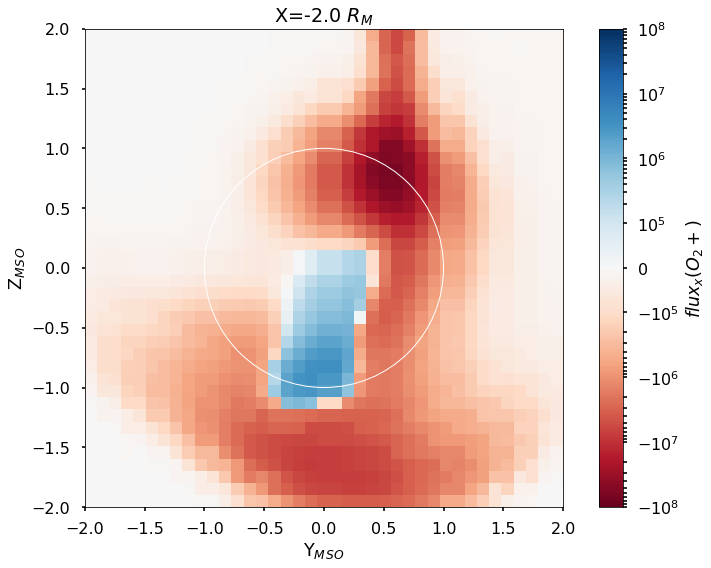

In [7]:
y = np.linspace(-2.0, 2.0, 40)
z = np.linspace(-2.0, 2.0, 40)

meshgrid_y, meshgrid_z = np.meshgrid(y,z)
cmap = 'RdBu'
vmin, vmax = -1e8, 1e8
#vmin, vmax = np.min(flux_x_vals_lr), np.max(flux_x_vals_lr)
norm = SymLogNorm(vmin=vmin, vmax=vmax,linthresh=1e5)
#norm = Normalize(vmin=vmin, vmax=vmax)
#norm = LogNorm(vmin=vmin, vmax=vmax)
fig, ax = plt.subplots(1)
plt.pcolormesh(meshgrid_y, meshgrid_z, flux_x_vals_lr.reshape(meshgrid_y.shape),cmap=cmap,norm=norm,rasterized=True,vmin=vmin,vmax=vmax)
plt.xlabel('Y$_M$$_S$$_O$')
plt.ylabel('Z$_M$$_S$$_O$')
plt.colorbar(label='$flux_x(O_2+)$')#,format= '%.0e')
plt.gca().set_aspect('equal')
plt.title('X=-2.0 $R_M$')
circ1 = Circle((0,0), 1, facecolor='none', edgecolor='w', lw=1)
ax.add_patch(circ1)
plt.savefig('LR_flux_tail_x_2_log.png')

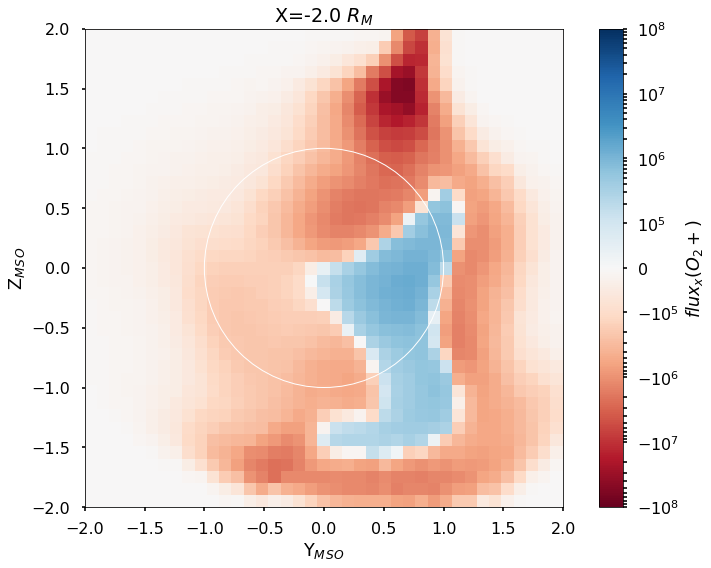

In [8]:
y = np.linspace(-2.0, 2.0, 40)
z = np.linspace(-2.0, 2.0, 40)

meshgrid_y, meshgrid_z = np.meshgrid(y,z)
cmap = 'RdBu'
#vmin, vmax = np.min(flux_x_vals_hr) , np.max(flux_x_vals_hr) 
vmin, vmax = -1e8, 1e8
norm = SymLogNorm(vmin=vmin, vmax=vmax, linthresh=1e5)
fig, ax = plt.subplots(1)
plt.pcolormesh(meshgrid_y, meshgrid_z, flux_x_vals_hr.reshape(meshgrid_y.shape),cmap=cmap,norm=norm,rasterized=True,vmin=vmin,vmax=vmax)
plt.xlabel('Y$_M$$_S$$_O$')
plt.ylabel('Z$_M$$_S$$_O$')
plt.colorbar(label='$flux_x(O_2+)$')#,format= '%.0e')
plt.gca().set_aspect('equal')
plt.title('X=-2.0 $R_M$')
circ1 = Circle((0,0), 1, facecolor='none', edgecolor='w', lw=1)
ax.add_patch(circ1)
plt.savefig('HR_flux_tail_x_2_log.png')

In [47]:
print np.mean(flux_x_vals_lr), np.mean(flux_x_vals_hr)
print np.median(flux_x_vals_lr), np.median(flux_x_vals_hr)

-1566322.1975435975 -591237.7266290069
-65103.9669322884 -46739.204282660605
